In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sn

In [2]:
crime_data = pd.read_csv("/Users/ridhi/Desktop/Crime_Data_from_2020_to_Present (1).csv")

In [3]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
crime_data.info()
crime_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986500 entries, 0 to 986499
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           986500 non-null  int64  
 1   Date Rptd       986500 non-null  object 
 2   DATE OCC        986500 non-null  object 
 3   TIME OCC        986500 non-null  int64  
 4   AREA            986500 non-null  int64  
 5   AREA NAME       986500 non-null  object 
 6   Rpt Dist No     986500 non-null  int64  
 7   Part 1-2        986500 non-null  int64  
 8   Crm Cd          986500 non-null  int64  
 9   Crm Cd Desc     986500 non-null  object 
 10  Mocodes         840065 non-null  object 
 11  Vict Age        986500 non-null  int64  
 12  Vict Sex        846925 non-null  object 
 13  Vict Descent    846914 non-null  object 
 14  Premis Cd       986486 non-null  float64
 15  Premis Desc     985915 non-null  object 
 16  Weapon Used Cd  326368 non-null  float64
 17  Weapon Des

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.865000e+05,986500.000000,986500.000000,986500.000000,986500.000000,986500.000000,986500.000000,986486.000000,326368.000000,986489.000000,68912.000000,2310.000000,64.00000,986500.000000,986500.000000
mean,2.198270e+08,1339.086392,10.698086,1116.245129,1.403666,500.782398,29.045177,306.054803,363.846008,500.538333,958.162091,984.198701,991.21875,33.996033,-118.083281
std,1.299240e+07,651.457178,6.108873,611.002343,0.490632,206.092913,21.976666,219.156166,123.699000,205.891829,110.250287,51.495991,27.06985,1.633543,5.661853
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106103e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208174e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.310049e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499289e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [5]:
crime_data = crime_data.drop(columns=['Crm Cd 3', 'Crm Cd 4'])

In [6]:
crime_data['Mocodes'].fillna('Unknown', inplace=True)
crime_data['Vict Sex'].fillna('Unknown', inplace=True)
crime_data['Vict Descent'].fillna('Unknown', inplace=True)
crime_data['Weapon Used Cd'].fillna(0, inplace=True) 
crime_data['Weapon Desc'].fillna('No weapon', inplace=True)

In [7]:
crime_data.columns = crime_data.columns.str.lower().str.replace(' ', '_')

In [8]:
crime_data['date_occ'] = pd.to_datetime(crime_data['date_occ'], errors='coerce')
crime_data['year'] = crime_data['date_occ'].dt.year
crime_data['month'] = crime_data['date_occ'].dt.month
crime_data['day'] = crime_data['date_occ'].dt.day
crime_data['hour'] = crime_data['time_occ'] // 100

In [9]:
crime_data['is_weekend'] = crime_data['date_occ'].dt.weekday >= 5

In [10]:
traffic_data = pd.read_csv("/Users/ridhi/Desktop/Motor_Vehicle_Collisions_-_Crashes (1).csv" , low_memory=False)

In [11]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130063 entries, 0 to 2130062
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [12]:
traffic_data['CRASH DATE'] = pd.to_datetime(traffic_data['CRASH DATE'], errors='coerce')

traffic_data_filtered = traffic_data.dropna(subset=['LATITUDE', 'LONGITUDE'])
print(traffic_data_filtered[['LATITUDE', 'LONGITUDE']].head())

    LATITUDE  LONGITUDE
3  40.667202 -73.866500
4  40.683304 -73.917274
6  40.709183 -73.956825
7  40.868160 -73.831480
8  40.671720 -73.897100


In [13]:
merged_data = pd.merge(
    crime_data,
    traffic_data,
    how='inner',
    left_on=['date_occ', 'lat', 'lon'],
    right_on=['CRASH DATE', 'LATITUDE', 'LONGITUDE']
)

In [14]:
merged_data.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,201808884,03/29/2020 12:00:00 AM,2020-03-29,1430,18,Southeast,1823,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,NaN,4304457,Sedan,NaN,NaN,NaN,NaN
1,201808884,03/29/2020 12:00:00 AM,2020-03-29,1430,18,Southeast,1823,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Unspecified,Unspecified,NaN,NaN,4305057,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
2,201808884,03/29/2020 12:00:00 AM,2020-03-29,1430,18,Southeast,1823,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,NaN,4304618,Sedan,NaN,NaN,NaN,NaN
3,201808884,03/29/2020 12:00:00 AM,2020-03-29,1430,18,Southeast,1823,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,NaN,4304781,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,201808884,03/29/2020 12:00:00 AM,2020-03-29,1430,18,Southeast,1823,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Unspecified,NaN,NaN,NaN,4304379,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [15]:
merged_data.to_csv("/Users/ridhi/Desktop/final_crime_data.csv", index=False)

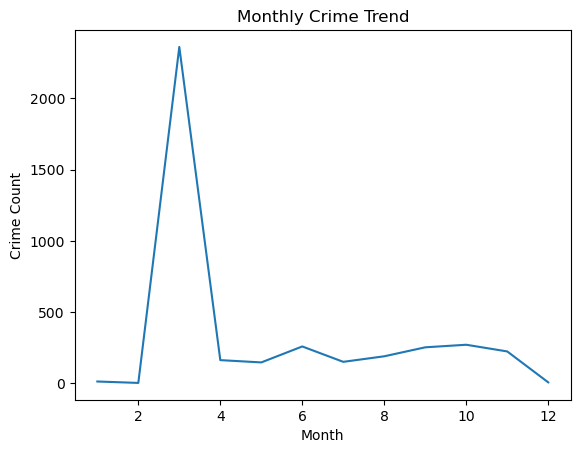

In [16]:
monthly_trend = merged_data.groupby('month').size()
monthly_trend.plot(kind='line', title="Monthly Crime Trend")
pt.xlabel("Month")
pt.ylabel("Crime Count")
pt.show()

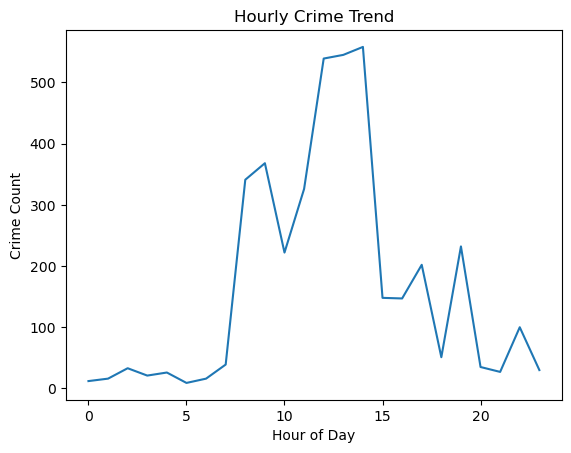

In [17]:
hourly_trend = merged_data.groupby('hour').size()
hourly_trend.plot(kind='line', title="Hourly Crime Trend")
pt.xlabel("Hour of Day")
pt.ylabel("Crime Count")
pt.show()

In [18]:
top_locations = merged_data['location'].value_counts().head(5)
print("Top 5 Crime Hotspots:\n", top_locations)

Top 5 Crime Hotspots:
 9500    LAUREL CANYON                BL    121
6800    HOLLYWOOD                    BL     93
800 N  ALAMEDA                      ST      72
3100    FOLSOM                       ST     65
600 W  7TH                          ST      65
Name: location, dtype: int64


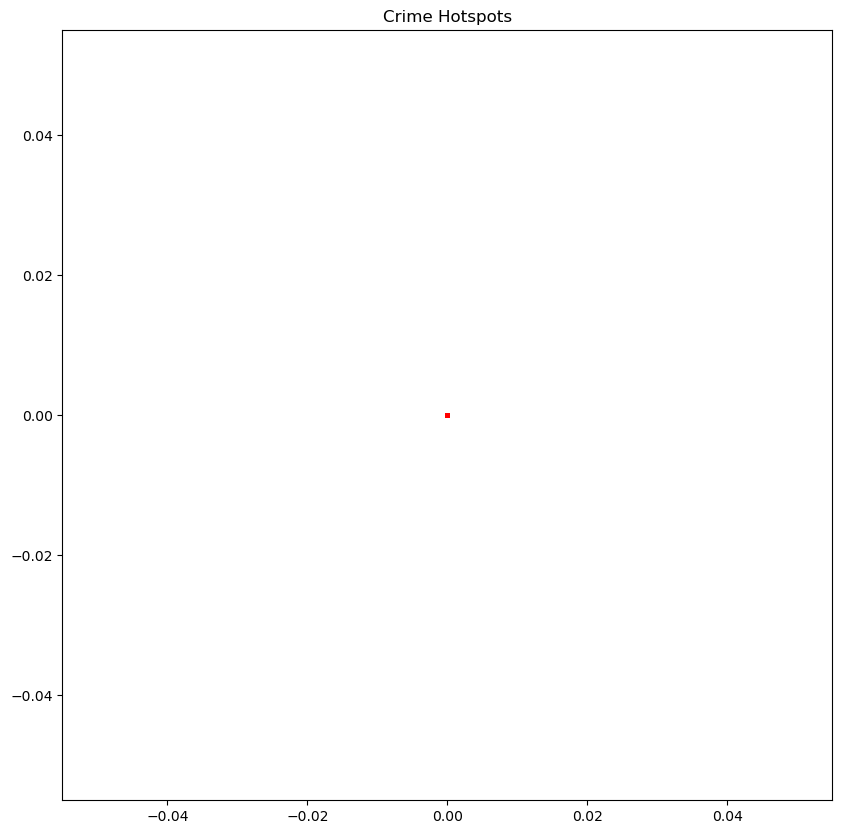

In [19]:
import geopandas as gpd
from shapely.geometry import Point

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged_data, geometry=gpd.points_from_xy(merged_data.lon, merged_data.lat)
)

# Plot the hotspots
gdf.plot(marker='o', color='red', markersize=5, figsize=(10, 10))
pt.title("Crime Hotspots")
pt.show()


Top 10 Crime Categories:
 BATTERY - SIMPLE ASSAULT                           892
TRESPASSING                                        812
INTIMATE PARTNER - SIMPLE ASSAULT                  453
THEFT PLAIN - PETTY ($950 & UNDER)                 209
VIOLATION OF RESTRAINING ORDER                     199
VIOLATION OF COURT ORDER                           125
ARSON                                              125
BATTERY WITH SEXUAL CONTACT                        124
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)    107
OTHER MISCELLANEOUS CRIME                          105
Name: crm_cd_desc, dtype: int64


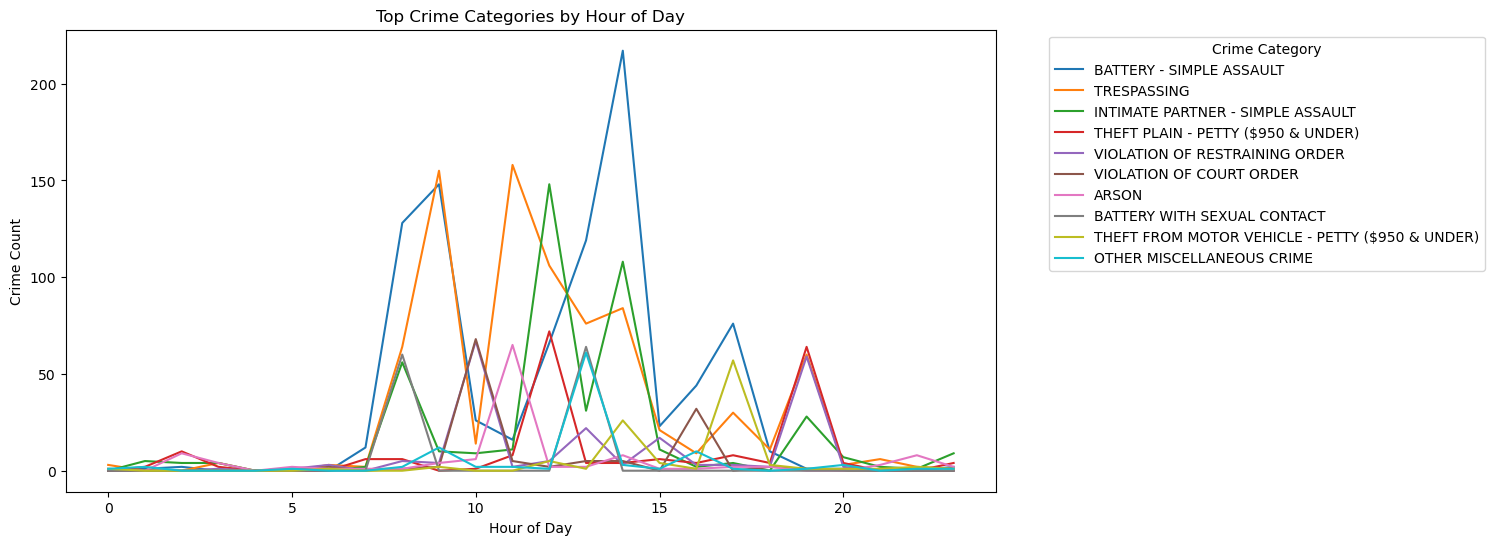

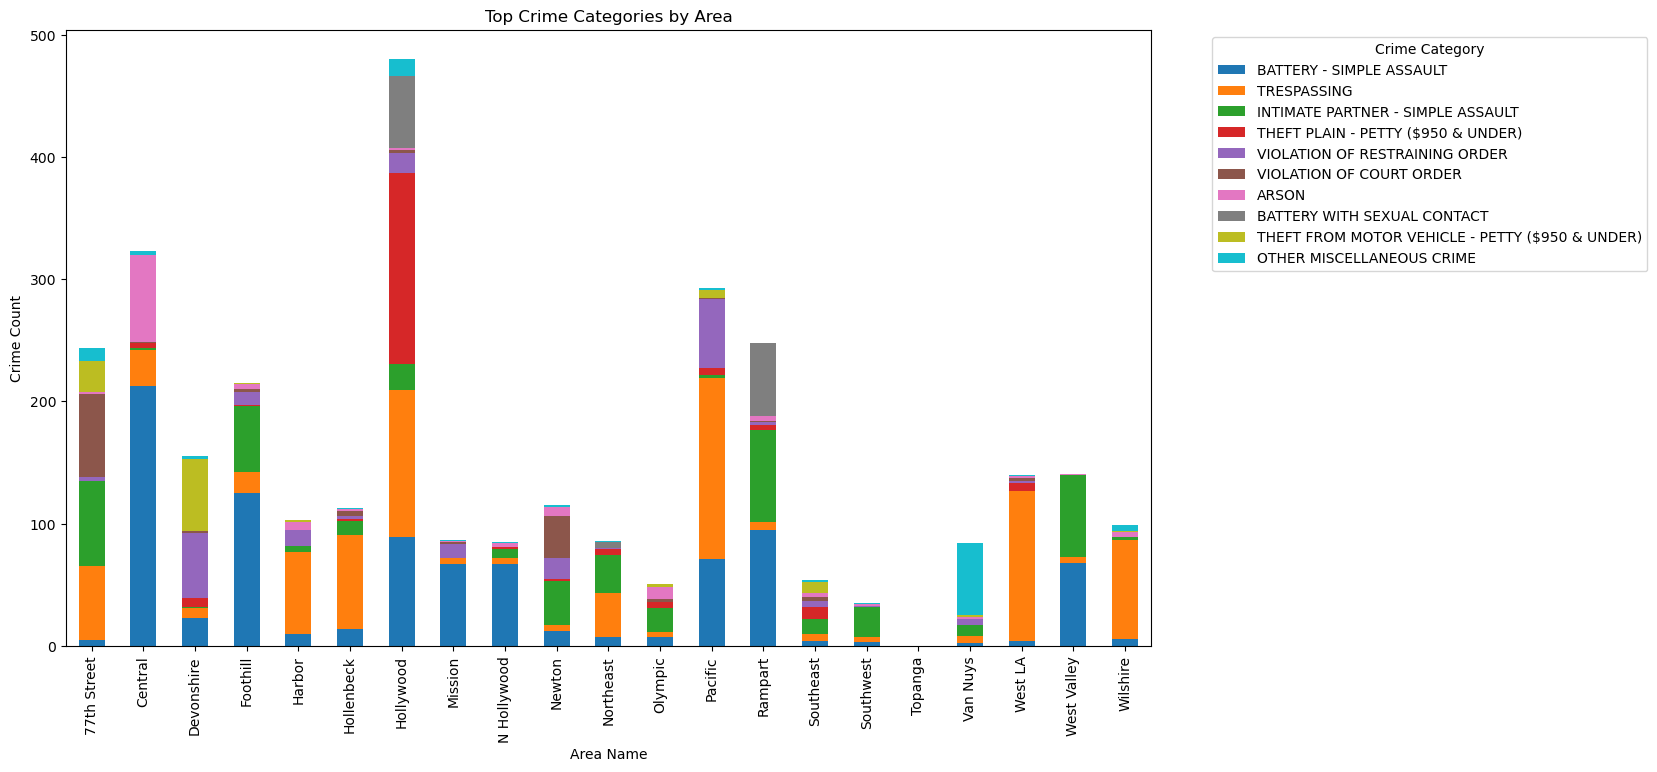

In [20]:
# Find the top 10 most common crime categories
top_crime_categories = merged_data['crm_cd_desc'].value_counts().head(10)
print("Top 10 Crime Categories:\n", top_crime_categories)

# Crime categories by hour of day
crime_by_hour = merged_data.groupby(['hour', 'crm_cd_desc']).size().unstack().fillna(0)
crime_by_hour[top_crime_categories.index].plot(kind='line', figsize=(12, 6))
pt.title("Top Crime Categories by Hour of Day")
pt.xlabel("Hour of Day")
pt.ylabel("Crime Count")
pt.legend(title="Crime Category", bbox_to_anchor=(1.05, 1), loc='upper left')
pt.show()

# Crime categories by area (if area_name is available)
if 'area_name' in merged_data.columns:
    crime_by_area = merged_data.groupby(['area_name', 'crm_cd_desc']).size().unstack().fillna(0)
    top_crime_categories_area = crime_by_area[top_crime_categories.index]
    top_crime_categories_area.plot(kind='bar', stacked=True, figsize=(14, 8))
    pt.title("Top Crime Categories by Area")
    pt.xlabel("Area Name")
    pt.ylabel("Crime Count")
    pt.legend(title="Crime Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    pt.show()

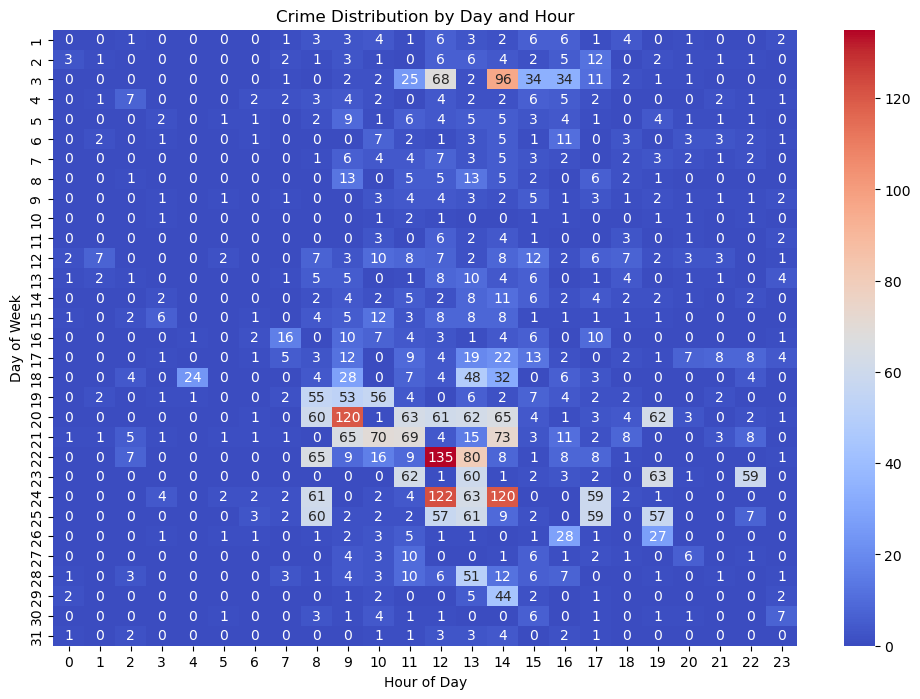

In [21]:
# Create a heatmap for day of the week and hour distribution
pt.figure(figsize=(12, 8))
sn.heatmap(pd.crosstab(merged_data['day'], merged_data['hour']), cmap="coolwarm", annot=True, fmt="d")
pt.xlabel("Hour of Day")
pt.ylabel("Day of Week")
pt.title("Crime Distribution by Day and Hour")
pt.show()


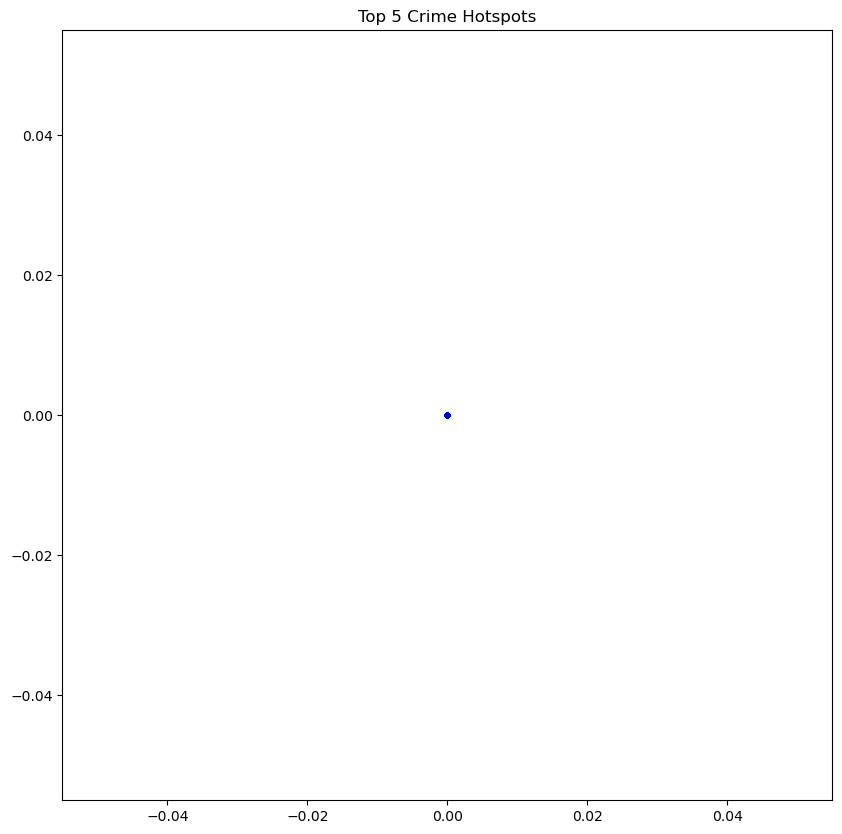

In [22]:
top_5_locations = gdf[gdf['location'].isin(top_locations.index)]
top_5_locations.plot(marker='o', color='blue', markersize=10, figsize=(10, 10))
pt.title("Top 5 Crime Hotspots")
pt.show()

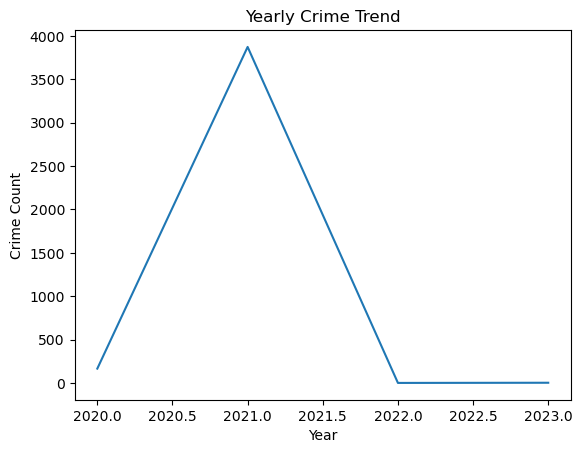

In [23]:
yearly_trend = merged_data.groupby('year').size()
yearly_trend.plot(kind='line', title="Yearly Crime Trend")
pt.xlabel("Year")
pt.ylabel("Crime Count")
pt.show()